In [1]:
import os
import nibabel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ia_mri_tools.ia_mri_tools import coil_correction
def imshow(h, n, m, i, title=None):
    plt.subplot(n, m, i)
    plt.imshow(h[:,::-1].transpose(), cmap='gray', vmin=np.percentile(h,2), vmax=np.percentile(h,98))
    plt.axis('off')
    if title:
        plt.title(title)

In [2]:
# Load the data
#   a single slice for demonstration
z = 120

data_path = 'data/HCP/100307'
t1 = nibabel.load(os.path.join(data_path, 'T1w_acpc_dc.nii.gz')).get_data()[:,:,z]
t2 = nibabel.load(os.path.join(data_path, 'T2w_acpc_dc.nii.gz')).get_data()[:,:,z]
# and the HCP's corrected data for reference
t1r = nibabel.load(os.path.join(data_path, 'T1w_acpc_dc_restore.nii.gz')).get_data()[:,:,z]
t2r = nibabel.load(os.path.join(data_path, 'T2w_acpc_dc_restore.nii.gz')).get_data()[:,:,z]

In [3]:
# The sum of T1 and T2 is reasonably flat and serves as a good reference
pd = t1+t2

# Compute the correction
c = coil_correction(pd)

# Apply the correction
cpd = c*pd
ct1 = c*t1
ct2 = c*t2

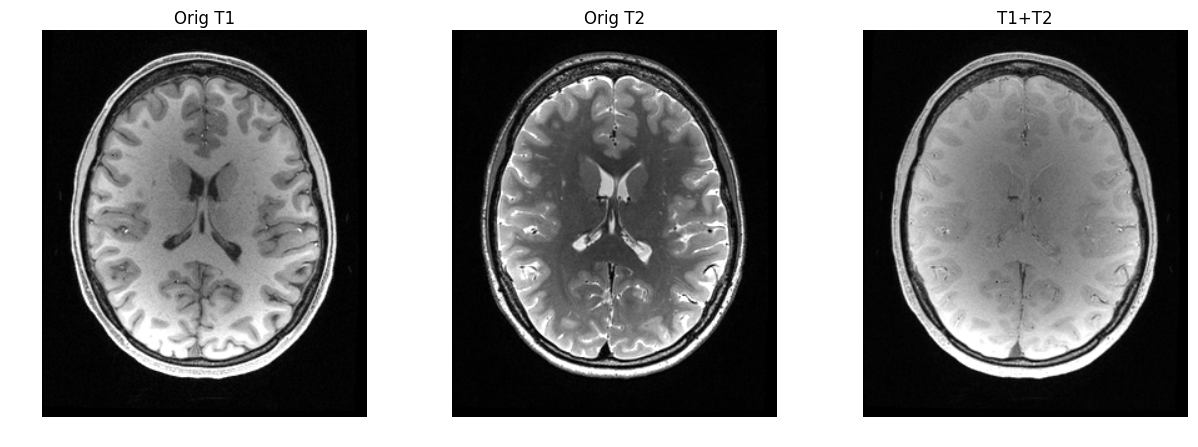

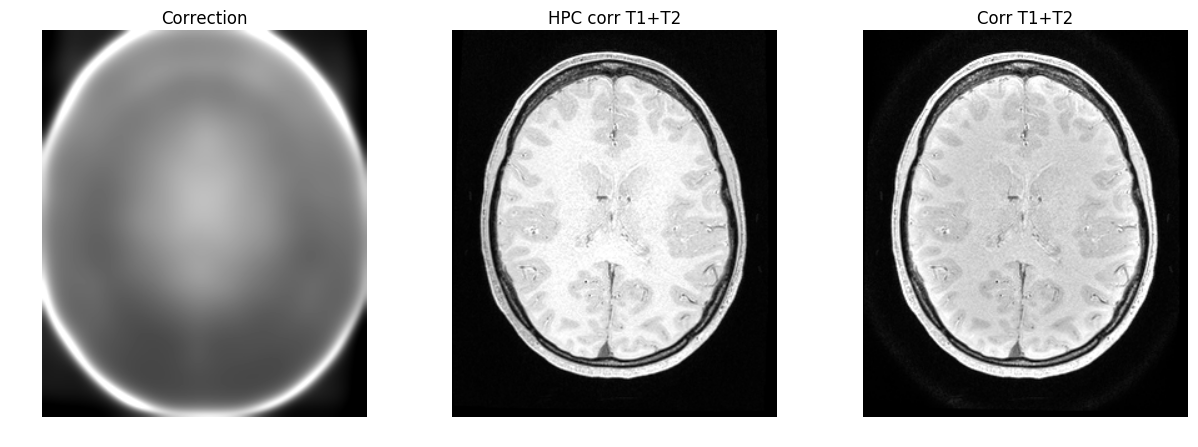

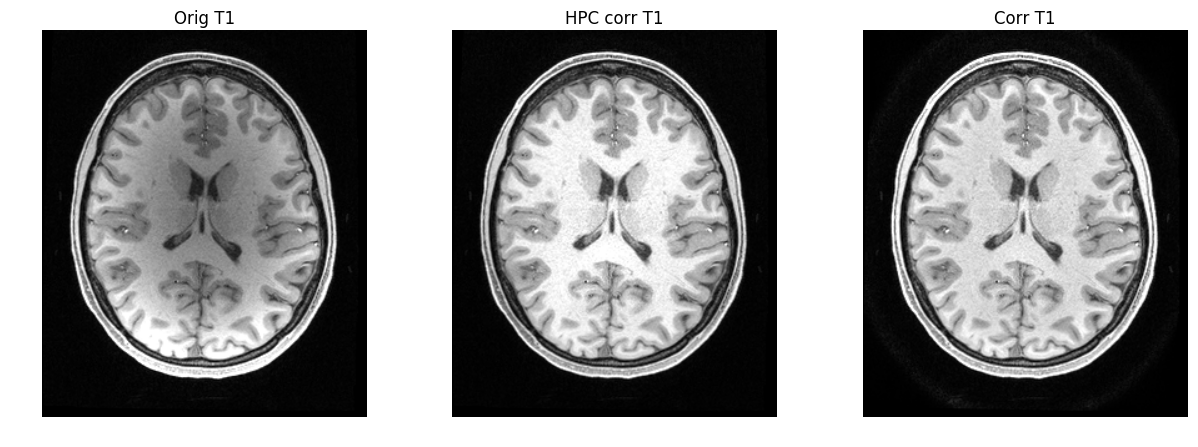

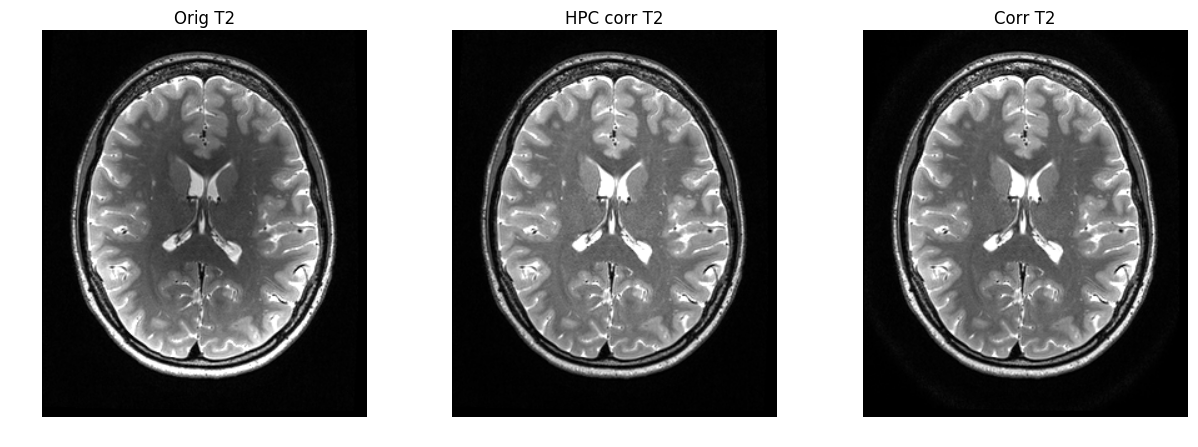

In [4]:
plt.figure(figsize=[15,5])
imshow(t1, 1,3,1, 'Orig T1')
imshow(t2, 1,3,2, 'Orig T2')
imshow(pd, 1,3,3, 'T1+T2')

plt.figure(figsize=[15,5])
imshow(c, 1,3,1, 'Correction')
imshow(t1r+t2r, 1,3,2, 'HPC corr T1+T2')
imshow(cpd, 1,3,3, 'Corr T1+T2')

plt.figure(figsize=[15,5])
imshow(t1, 1,3,1, 'Orig T1')
imshow(t1r, 1,3,2, 'HPC corr T1')
imshow(ct1, 1,3,3, 'Corr T1')

plt.figure(figsize=[15,5])
imshow(t2, 1,3,1, 'Orig T2')
imshow(t2r, 1,3,2, 'HPC corr T2')
imshow(ct2, 1,3,3, 'Corr T2')